In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [83]:
train_data = pd.read_csv('Location of file')

In [84]:
train_data

,trackid,trackname,popularity,releasedate,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,valence,duration,genre
0,5UWwZ5lm5PKu6eKsHAGxOk,Everlong,84,1997-05-20,"{'id 1': '7jy3rLJdDQY21OgRLCZ9sD', 'name 1': '...",0.000060,0.413,0.881,0.000308,0.0805,-5.541,0.0367,158.066,11,0,0.364,250547,metal
1,60a0Rd6pjrkxjPbaKzXjfq,In the End,86,2000-10-24,"{'id 1': '6XyY86QOPPrYVGvF9ch6wz', 'name 1': '...",0.009580,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,3,0,0.400,216880,metal
2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,83,2001-09-04,"{'id 1': '5eAWCfyUhZtHHtBdNk56l1', 'name 1': '...",0.000278,0.417,0.934,0.001500,0.1320,-3.908,0.1190,127.066,7,0,0.287,210240,metal
3,373gDROnujxNTFa1FojYIl,Lost,84,2023-02-10,"{'id 1': '6XyY86QOPPrYVGvF9ch6wz', 'name 1': '...",0.004120,0.596,0.798,0.000000,0.3380,-4.630,0.0285,105.010,0,1,0.459,199342,metal
4,3VqHuw0wFlIHcIPWkhIbdQ,Enter Sandman (Remastered),75,1991-08-12,"{'id 1': '2ye2Wgw4gimLv2eAKyk1NB', 'name 1': '...",0.002770,0.566,0.834,0.008000,0.0625,-8.412,0.0298,123.296,6,0,0.621,331560,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,3EVwNrVchN0ohZAe9j03C3,Hate Being Alone,37,2018-11-29,"{'id 1': '20DZAfCuP1TKZl5KcY7z3Q', 'name 1': '...",0.013200,0.501,0.969,0.000005,0.1390,-2.011,0.3530,74.767,7,1,0.170,236833,dubstep
49998,6S8VqLOpx3ljoHWMisHJTy,Space Cathedral - Jkyl & Hyde Remix,29,2023-03-24,"{'id 1': '74RET4rCZPTGzhsLjD0i3g', 'name 1': '...",0.027800,0.379,0.936,0.781000,0.1190,-1.605,0.0890,137.475,1,0,0.124,250286,dubstep
49999,0gsPInjPU6qsGGdLnpgTHD,Melting (feat. EASAE),39,2021-09-17,"{'id 1': '06MSAITCPRhtuJMD4UL96s', 'name 1': '...",0.070800,0.159,0.589,0.001910,0.1060,-6.176,0.0599,74.920,9,1,0.152,270800,dubstep
50000,2ULg8Cw0Ckn5JDGUkCNXko,Hung Up,41,2016-12-02,"{'id 1': '521qvhdobR0GzhvU6TFw76', 'name 1': '...",0.416000,0.443,0.726,0.000000,0.3690,-3.745,0.1670,119.824,7,1,0.370,220000,dubstep


In [85]:
train_data = train_data.drop(columns = ['trackid','trackname','releasedate','artists','key','genre'])
train_data.head()
train_data_columns = train_data.columns
print(train_data_columns)

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'mode', 'valence', 'duration'],
      dtype='object')


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)

StandardScaler()

In [87]:
scaled_data = scaler.transform(train_data)
print(type(scaled_data))

<class 'numpy.ndarray'>


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print('scaled data shape ',scaled_data.shape)
print('pca shape ',x_pca.shape)

scaled data shape  (50002, 12)
pca shape  (50002, 2)


<ipython-input-89-bcb05aad803e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')


Text(0, 0.5, 'Second Principal Component')

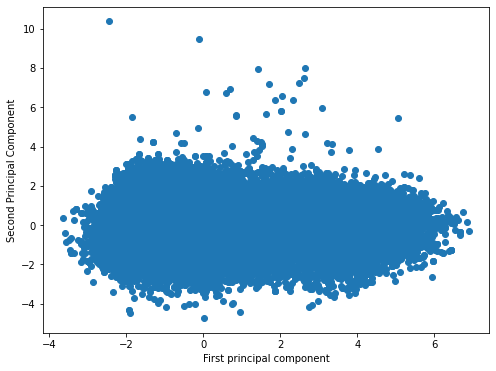

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [90]:
print("explained variance %",pca.explained_variance_ratio_*100)
print(pca.components_)

explained variance % [28.30962314 10.39564919]
[[-1.69586482e-01  4.31646065e-01 -3.08558928e-01 -4.75819198e-01
   3.34430162e-01 -1.07165546e-01 -4.70932693e-01 -1.50146857e-01
  -1.50035310e-01  5.98191540e-02 -2.63763014e-01  2.41641583e-04]
 [ 2.14585889e-01 -2.24797346e-01 -5.49669695e-01  1.64777939e-01
   3.73757950e-03  1.40087841e-01  1.70612599e-01 -2.39875542e-01
   3.14422320e-01  4.72698015e-02 -5.48221408e-01  2.57294496e-01]]


<Axes: >

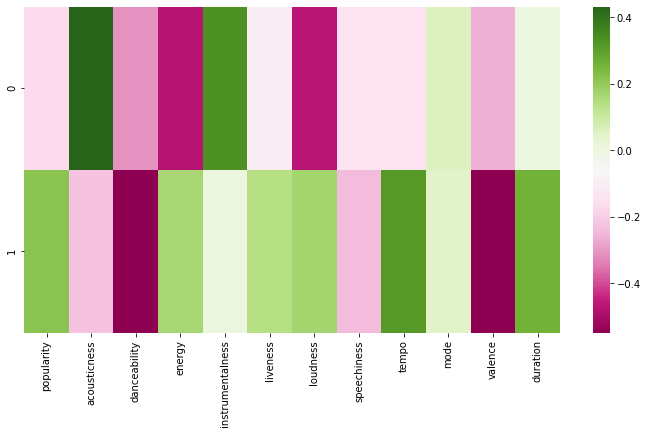

In [91]:
map= pd.DataFrame(pca.components_,columns=train_data_columns)
plt.figure(figsize=(12,6))
sb.heatmap(map,cmap='PiYG')

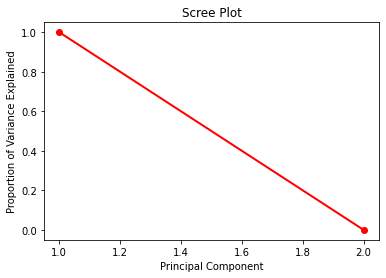

In [92]:
pca.fit(train_data)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [93]:
print(pca.explained_variance_ratio_)

[9.99999921e-01 4.89090017e-08]
